# 🌤️ Feature Understanding — Hanoi Temperature Forecasting (2015–2025)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8,5)
sns.set_style("whitegrid")

# --- Load dữ liệu daily ---
data_path = "data/raw data/Hanoi Daily 10 years.csv"
df = pd.read_csv(data_path)

# Chuẩn hoá thời gian
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df = df.sort_values("datetime").dropna(subset=["datetime"])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month

# Lọc giai đoạn 2015–2025
df = df[(df["year"] >= 2015) & (df["year"] <= 2025)]
print(f"✅ Dataset loaded: {df.shape[0]} rows × {df.shape[1]} cols; range: {df['datetime'].min().date()} → {df['datetime'].max().date()}")
df.head(3)

✅ Dataset loaded: 3660 rows × 35 cols; range: 2015-09-20 → 2025-09-26


name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Hanoi 2015-09-20     33.0     26.7  29.3          41.7          30.5   
1  Hanoi 2015-09-21     29.5     25.0  26.8          34.4          25.0   
2  Hanoi 2015-09-22     28.5     25.0  25.9          32.8          25.0   

   feelslike   dew  humidity  precip  precipprob  precipcover preciptype  \
0       35.4  25.7      81.5   1.400         100         4.17       rain   
1       29.2  24.3      86.3   9.105         100        12.50       rain   
2       26.5  24.2      90.5  31.003         100        12.50       rain   

   snow  snowdepth  windgust  windspeed  winddir  sealevelpressure  \
0     0          0      19.4       15.7     94.8            1007.6   
1     0          0      23.0       17.6     82.4            1006.2   
2     0          0      20.5       18.4     56.7            1006.3   

   cloudcover  visibility  solarradiation  solarenergy  uvindex  severerisk  \
0        72.2         7.9           142.1         12.2        5         NaN   
1        91.6         9.3            68.1          5.8        3         NaN   
2        90.7         8.4            81.7          7.2        3         NaN   

               sunrise               sunset  moonphase  \
0  2015-09-20T05:44:39  2015-09-20T17:55:33       0.23   
1  2015-09-21T05:44:54  2015-09-21T17:54:36       0.25   
2  2015-09-22T05:45:08  2015-09-22T17:53:39       0.30   

               conditions                                        description  \
0  Rain, Partially cloudy  Partly cloudy throughout the day with late aft...   
1          Rain, Overcast  Cloudy skies throughout the day with a chance ...   
2          Rain, Overcast  Cloudy skies throughout the day with a chance ...   

   icon                                           stations  year  month  
0  rain  48820099999,48823099999,48825099999,4883109999...  2015      9  
1  rain  48820099999,48823099999,48825099999,4883109999...  2015      9  
2  rain  48820099999,48823099999,48825099999,4883109999...  2015      9

In [22]:
# Vẽ 1 cặp feature–target theo TỪNG NĂM (2015–2025)
import matplotlib.pyplot as plt

def plot_pair_by_year(df, feature, target="temp", title=None, use_rolling=False, roll_window=7):
    years = list(range(2015, 2026))
    ncols = 2
    nrows = (len(years) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3.6*nrows), sharex=False)
    axes = axes.ravel()

    # chọn cột plot (raw hoặc rolling)
    tgt_col  = target
    feat_col = feature
    data = df.sort_values("datetime").copy()
    if use_rolling:
        data[tgt_col+"_plot"]  = data[tgt_col].rolling(roll_window, min_periods=1).mean()
        data[feat_col+"_plot"] = data[feat_col].rolling(roll_window, min_periods=1).mean()
        tgt_col  = tgt_col  + "_plot"
        feat_col = feat_col + "_plot"
        title_suffix = f" (rolling {roll_window} ngày)"
    else:
        title_suffix = ""

    i = 0
    for y in years:
        ax = axes[i]
        sub = data[data["year"] == y]
        if len(sub):
            ax.plot(sub["datetime"], sub[target if tgt_col==target else tgt_col],  linewidth=1.2, label=f"{target} (°C)")
            ax.plot(sub["datetime"], sub[feature if feat_col==feature else feat_col], linewidth=1.2, label=f"{feature} (°C)")
            ax.set_title(f"Year {y}")
            ax.grid(alpha=0.3)
            ax.legend(loc="upper right", fontsize=8, frameon=False)
        else:
            ax.set_title(f"Year {y} (no data)")
            ax.axis("off")
        i += 1

    for j in range(i, len(axes)):
        axes[j].axis("off")

    main_title = title or f"{feature.upper()} vs {target.upper()} — Comparison by Year"
    plt.suptitle(main_title + title_suffix, fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()


## I. Seasonal Overview — Quy luật khí hậu Hà Nội (2015–2025)

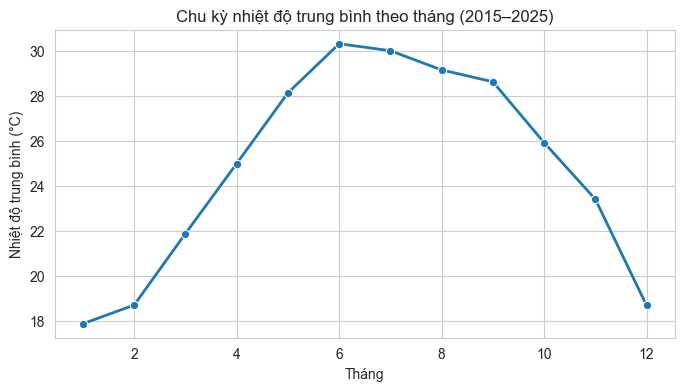

C:\Users\ttrun\AppData\Local\Temp\ipykernel_10896\2771820218.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='temp', order=['Winter','Spring','Summer','Autumn'], palette='coolwarm')


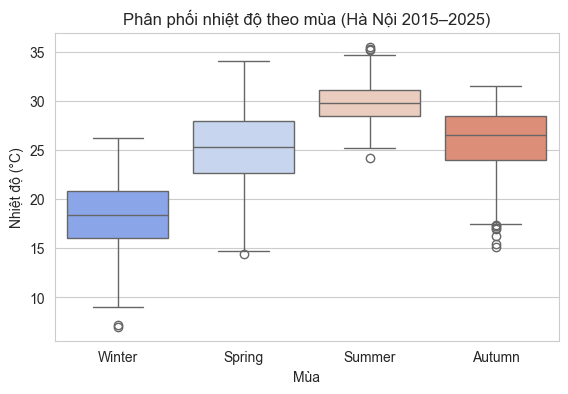

In [10]:
# Chu kỳ nhiệt trung bình theo tháng
monthly_temp = df.groupby('month')['temp'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_temp.index, y=monthly_temp.values, marker='o', linewidth=2)
plt.title('Chu kỳ nhiệt độ trung bình theo tháng (2015–2025)')
plt.xlabel('Tháng'); plt.ylabel('Nhiệt độ trung bình (°C)')
plt.show()

# Boxplot theo mùa
season_map = {12:'Winter', 1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring',
              6:'Summer', 7:'Summer', 8:'Summer', 9:'Autumn', 10:'Autumn', 11:'Autumn'}
df['season'] = df['month'].map(season_map)

plt.figure(figsize=(6.5,4))
sns.boxplot(data=df, x='season', y='temp', order=['Winter','Spring','Summer','Autumn'], palette='coolwarm')
plt.title('Phân phối nhiệt độ theo mùa (Hà Nội 2015–2025)')
plt.xlabel('Mùa'); plt.ylabel('Nhiệt độ (°C)')
plt.show()

**Nhận xét nhanh:** Hà Nội có chu kỳ 4 mùa rõ rệt — đỉnh nhiệt vào tháng 6–7 (mùa Hè), đáy vào tháng 1–2 (mùa Đông). Biên độ nhiệt ngày–đêm và nền nhiệt theo mùa là bối cảnh chi phối hành vi của mọi biến nhiệt độ phụ.

## II. Correlation tổng quan giữa các biến nhiệt độ

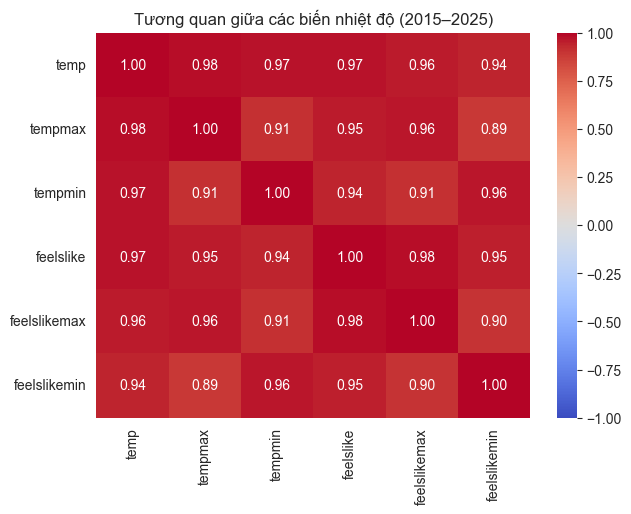

temp            1.000000
tempmax         0.977442
feelslike       0.973896
tempmin         0.969415
feelslikemax    0.957544
feelslikemin    0.942688
Name: temp, dtype: float64

In [11]:
cols = ['temp','tempmax','tempmin','feelslike','feelslikemax','feelslikemin']
corr_matrix = df[cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Tương quan giữa các biến nhiệt độ (2015–2025)')
plt.show()

corr_matrix['temp'].sort_values(ascending=False)

## III.TEMP_MAX vs `temp`

### 1️⃣ Domain Knowledge
- **Định nghĩa:** `tempmax` là nhiệt độ cực đại trong ngày (°C), hình thành từ cân bằng bức xạ vào ban ngày, đối lưu mặt đất–không khí và điều kiện mây mưa.
- **Yếu tố chi phối:** bức xạ mặt trời (mây → giảm), độ ẩm (cao → hạn chế gia tăng nhiệt), gió (tăng đối lưu → hạ nhiệt cục bộ), bề mặt đô thị (hiệu ứng đảo nhiệt).
- **Quy luật mùa vụ ở Hà Nội:** đỉnh đầu chiều 13–15h; mùa Hè 35–39°C; mùa Đông 20–25°C; biên độ ngày–đêm nhỏ hơn khi trời nhiều mây/mưa.

### 2️⃣ Observed Pattern
- Scatter `tempmax`–`temp` cho thấy các điểm **bám sát đường chéo**, biểu thị quan hệ gần tuyến tính.
- Theo năm 2015–2025, `tempmax` tăng–giảm đồng pha với `temp`; năm El Niño (ví dụ 2019, 2023) có **độ lệch cao** hơn trung bình.
- Biểu đồ mùa cho thấy biên độ ngày–đêm giảm trong mùa mưa do mây che và độ ẩm cao.

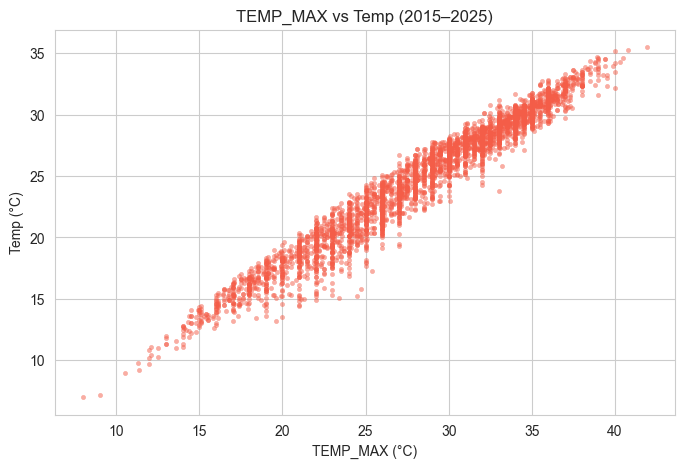

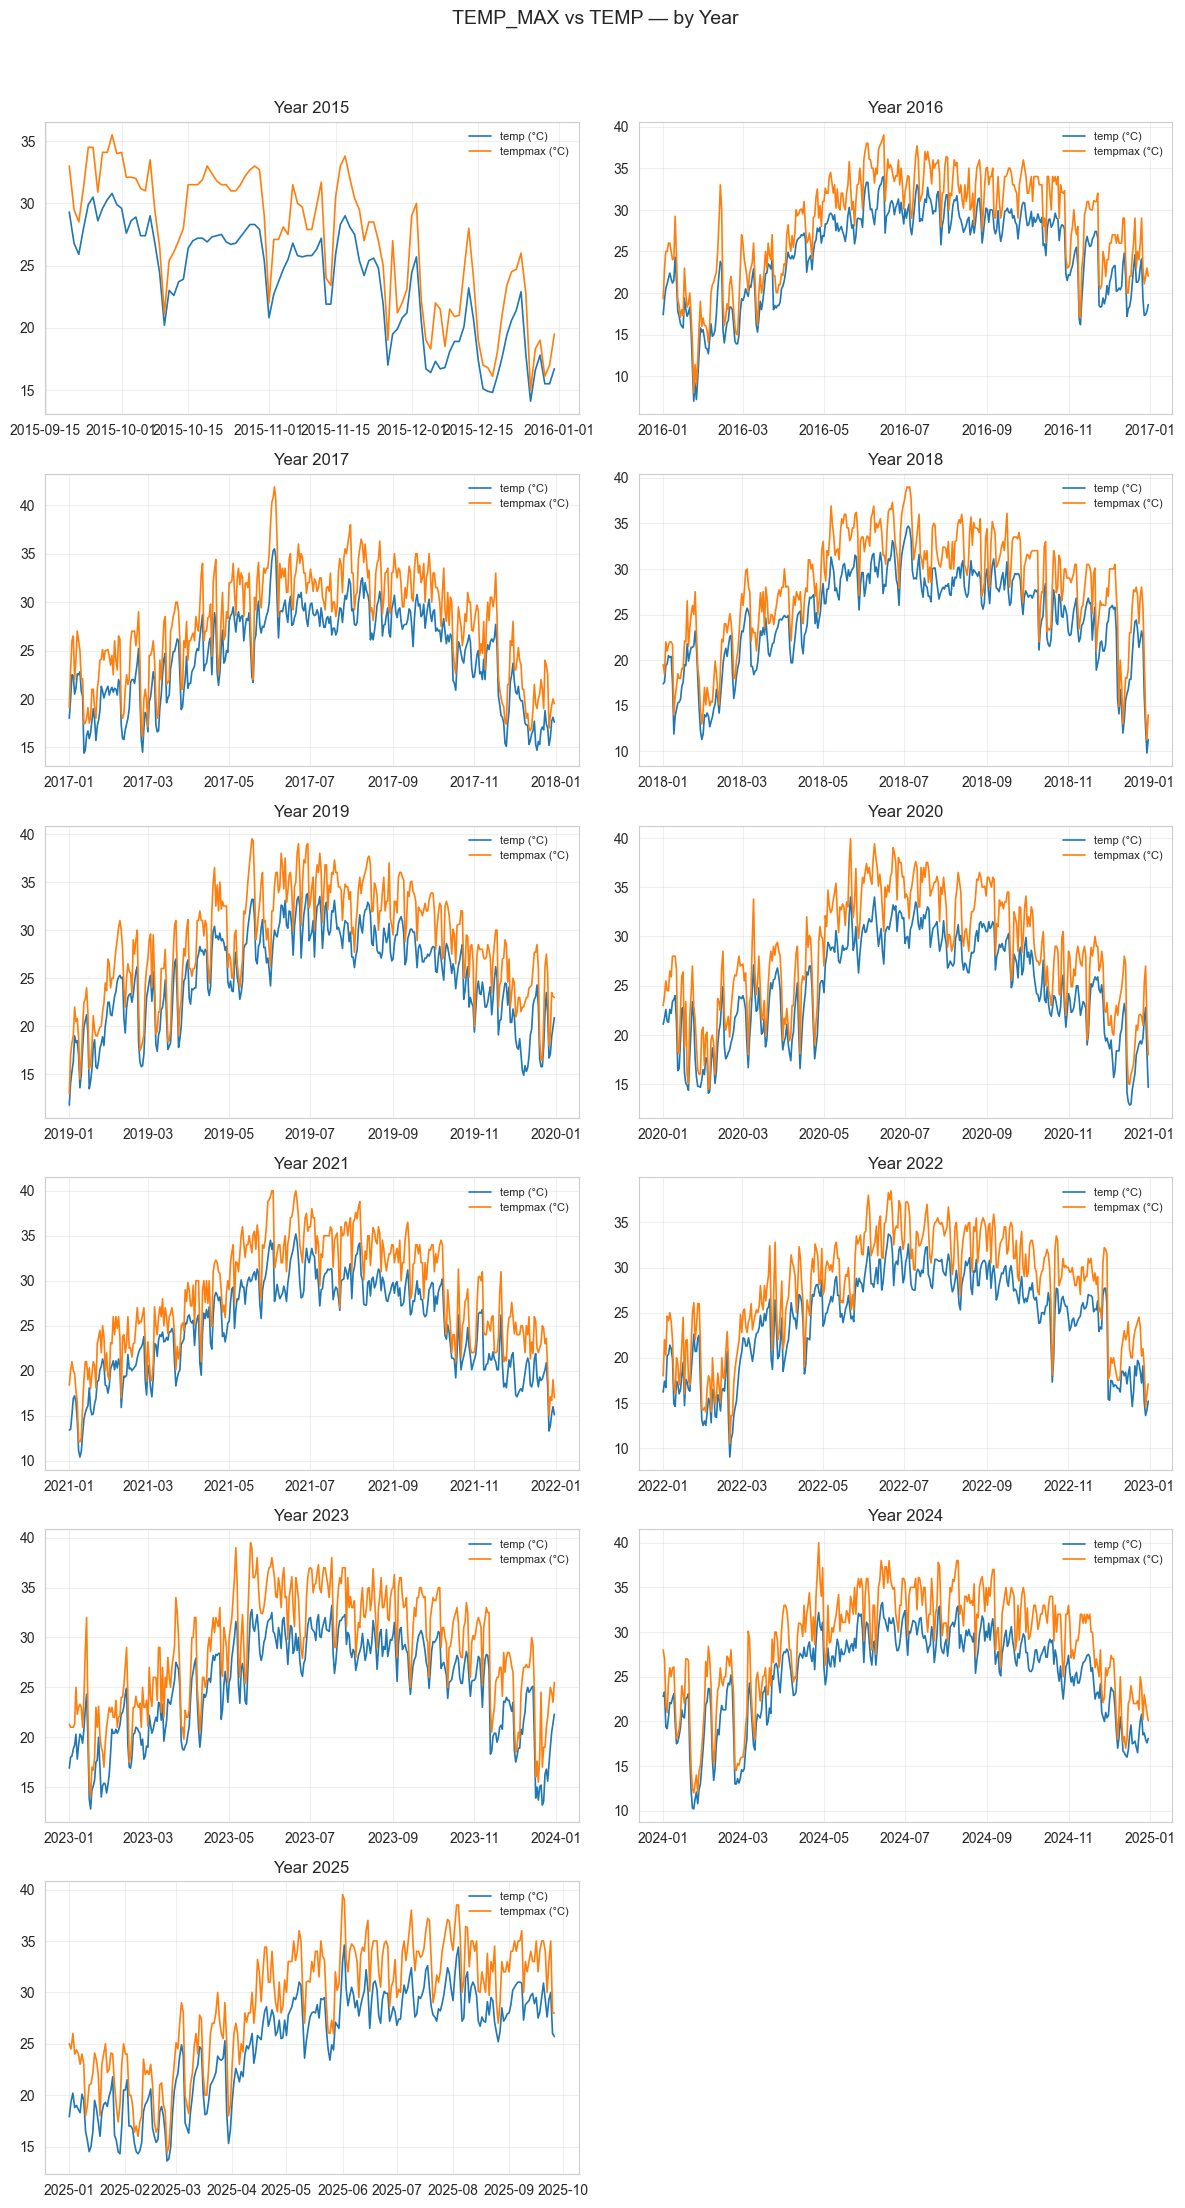

In [23]:
sns.scatterplot(x=df['tempmax'], y=df['temp'], s=10, alpha=0.5, edgecolor=None, color='#f45d48')
plt.title('TEMP_MAX vs Temp (2015–2025)')
plt.xlabel('TEMP_MAX (°C)'); plt.ylabel('Temp (°C)')
plot_pair_by_year(df, feature="tempmax", target="temp", title="TEMP_MAX vs TEMP — by Year", use_rolling=False)
plt.show()


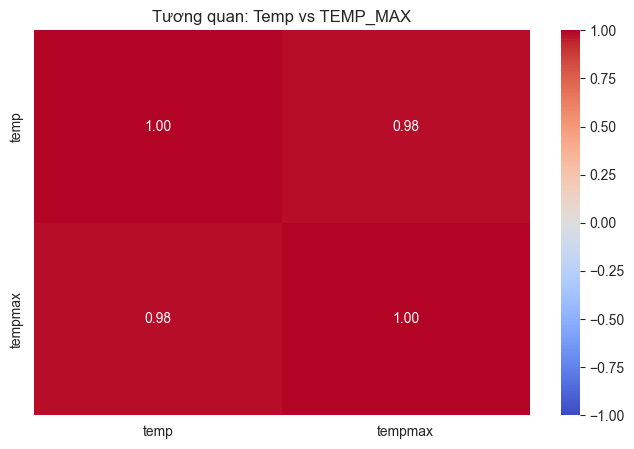

In [ ]:
sns.heatmap(df[['temp','tempmax']].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Tương quan: Temp vs TEMP_MAX(2015-2025)')
plt.show()

### 3️⃣ Hypothesis
**Giả định:** `tempmax` có quan hệ dương mạnh và gần tuyến tính với `temp`, vì nhiệt độ trung bình ngày là hàm của nhiệt độ cực đại và cực tiểu; `tempmax` đại diện **đỉnh nhiệt năng** trong 24h nên chi phối mạnh xu hướng của `temp`.

### 4️⃣ Verification
- **Pearson r≈0.95** giữa `temp` và `tempmax` (ổn định theo năm).  
- **Scatter** gần như tuyến tính; **heatmap** xác nhận mức tương quan dương rất cao; ít outlier.
- Điều này phù hợp cơ sở vật lý bức xạ–đối lưu: khi đỉnh nhiệt tăng, trung bình ngày tất yếu tăng.

### 5️⃣ Feature Engineering Decision
✅ **Giữ `tempmax`** trong mô hình.  
**Lag khuyến nghị:** {1, 3} ngày để mô phỏng quán tính nhiệt ngắn hạn.  
**Rolling khuyến nghị:** mean {3, 7} ngày để làm mượt dao động tuần.  
**Gợi ý mở rộng:** thử tương tác `tempmax × humidity` hoặc `tempmax × cloudcover` để nắm hiệu ứng nhiệt–ẩm/mây.

## III. TEMP_MIN vs `temp`

### 1️⃣ Domain Knowledge
- **Định nghĩa:** `tempmin` là nhiệt độ cực tiểu trong ngày (°C), thường xuất hiện gần rạng sáng (4–6h), chịu tác động mạnh bởi **bức xạ phát xạ ban đêm**, mây và độ ẩm (mây nhiều → giữ nhiệt → giảm hạ nhiệt về đêm).
- **Yếu tố chi phối:** mây (giữ nhiệt ban đêm), độ ẩm (tăng ngưng tụ → hạn chế hạ nhiệt mạnh), gió (trộn lớp biên), địa hình đô thị (giữ nhiệt).

### 2️⃣ Observed Pattern
- Phân tán `tempmin`–`temp` cho thấy quan hệ **dương mạnh** nhưng **độ dốc nhỏ hơn `tempmax`**; các điểm bớt tập trung dọc đường chéo do ảnh hưởng đêm.
- Theo mùa, `tempmin` tăng thấp nhất vào Đông và tăng cao vào Hè; biên độ mùa **ít đột ngột** hơn `tempmax`.

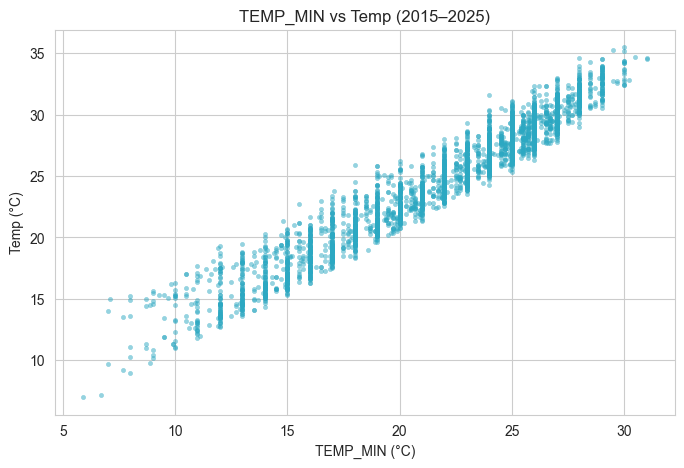

In [14]:
sns.scatterplot(x=df['tempmin'], y=df['temp'], s=10, alpha=0.5, edgecolor=None, color='#2ca8c2')
plt.title('TEMP_MIN vs Temp (2015–2025)')
plt.xlabel('TEMP_MIN (°C)'); plt.ylabel('Temp (°C)')
plt.show()

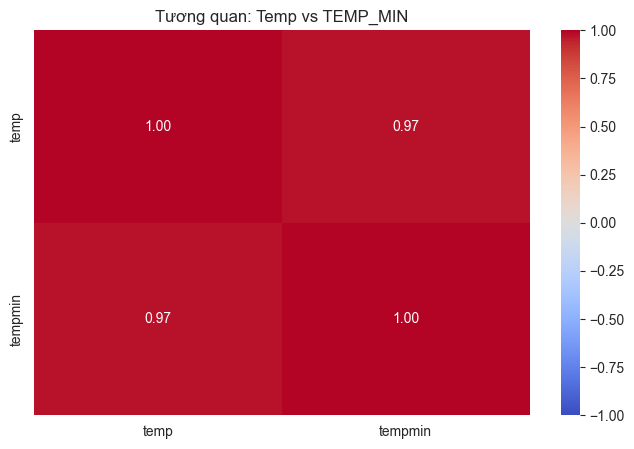

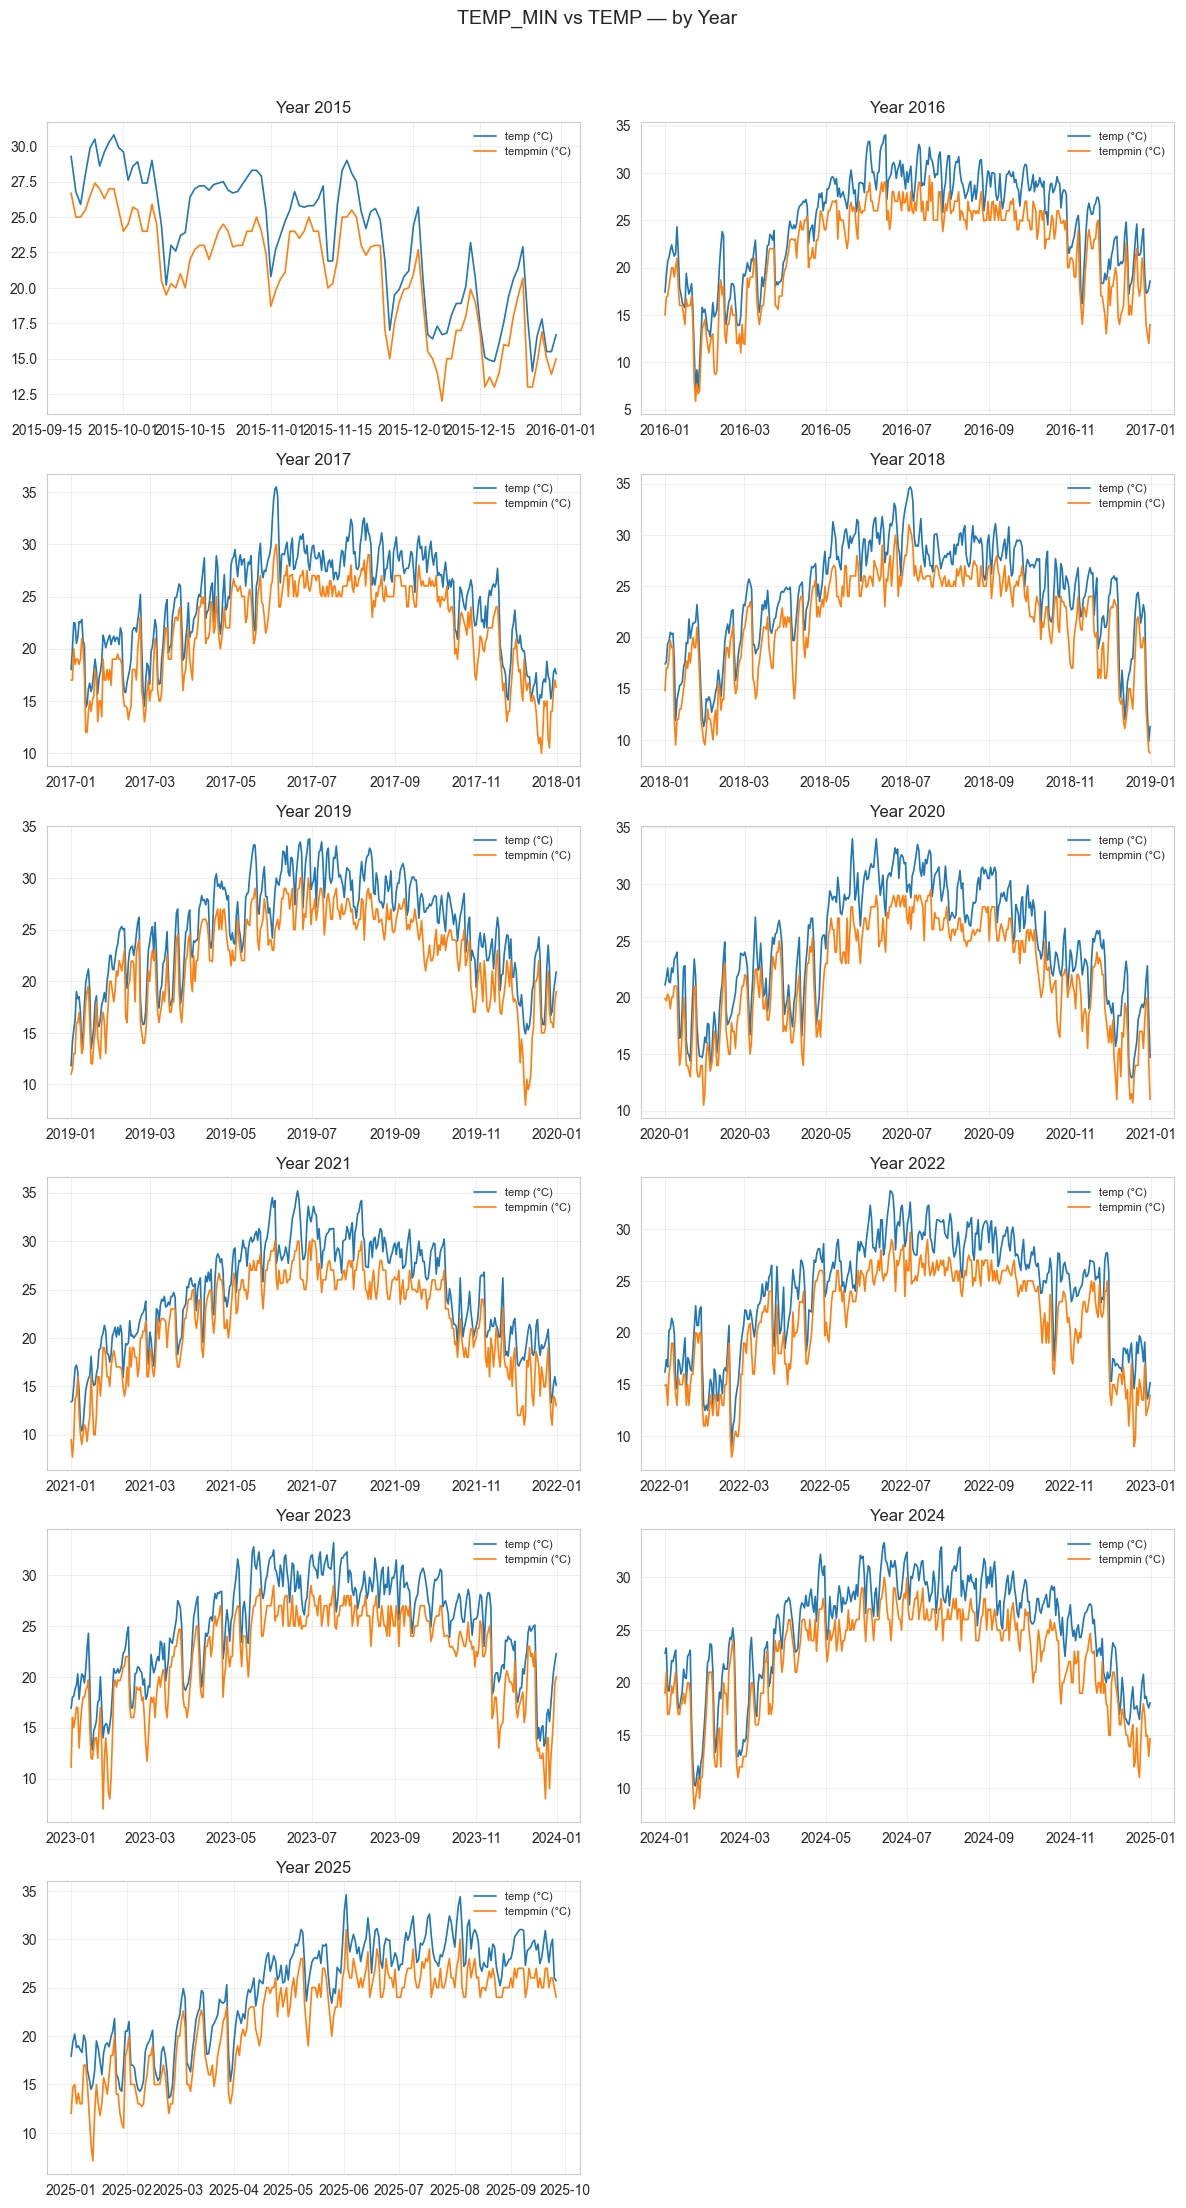

In [24]:
sns.heatmap(df[['temp','tempmin']].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Tương quan: Temp vs TEMP_MIN')
plot_pair_by_year(df, feature="tempmin", target="temp", title="TEMP_MIN vs TEMP — by Year", use_rolling=False)
plt.show()

### 3️⃣ Hypothesis
**Giả định:** `tempmin` phản ánh **nền nhiệt** ngày–đêm; khi `tempmin` tăng, `temp` tăng theo nhưng mức độ nhạy nhỏ hơn so với `tempmax` do ảnh hưởng tích luỹ nhiệt ban ngày.

### 4️⃣ Verification
- **Pearson r≈0.90** giữa `temp` và `tempmin`.  
- Scatter và heatmap xác nhận tương quan dương mạnh; mức phân tán lớn hơn do biến động bức xạ ban đêm, sương mù, mây thấp.

### 5️⃣ Feature Engineering Decision
✅ **Giữ `tempmin`**.  
**Lag:** {1, 3, 7} để nắm xu hướng nền nhiệt theo ngày/tuần.  
**Rolling:** mean {3, 7, 14} nhằm đại diện xu hướng nền dài hơi hơn `tempmax`.  
**Gợi ý:** tương tác `tempmax − tempmin` (biên độ ngày–đêm) như một feature bổ trợ.

## III. FEELSLIKE vs `temp`

### 1️⃣ Domain Knowledge
- **Định nghĩa:** `feelslike` (nhiệt độ cảm nhận) ước lượng cảm giác nhiệt của con người, kết hợp hiệu ứng **độ ẩm** và **gió** lên nhiệt độ thực.
- **Xấp xỉ công thức Steadman (điều kiện ôn đới):**  
  \( T_{feel} \approx T + 0.33\,RH − 0.70\,Wind − 4 \)  
  trong đó **RH**: độ ẩm tương đối (tỷ lệ 0–1 hoặc %), **Wind**: m/s.  
- **Ý nghĩa:** khi ẩm cao → cảm nhận nóng hơn; khi gió mạnh → cảm nhận lạnh hơn.

### 2️⃣ Observed Pattern
- `feelslike` thường **bám sát** `temp` nhưng có **độ lệch có hệ thống** theo ẩm/gió (mùa Hè ẩm → lệch dương; mùa Đông gió mạnh → lệch âm).
- Scatter với `temp` gần tuyến tính; nhiễu tăng nhẹ ở điều kiện cực trị (mưa lớn, gió mạnh).

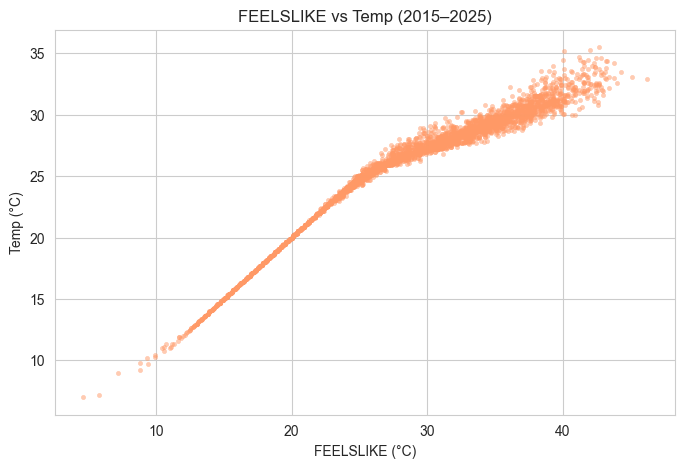

In [16]:
sns.scatterplot(x=df['feelslike'], y=df['temp'], s=10, alpha=0.5, edgecolor=None, color='#ff9966')
plt.title('FEELSLIKE vs Temp (2015–2025)')
plt.xlabel('FEELSLIKE (°C)'); plt.ylabel('Temp (°C)')
plt.show()

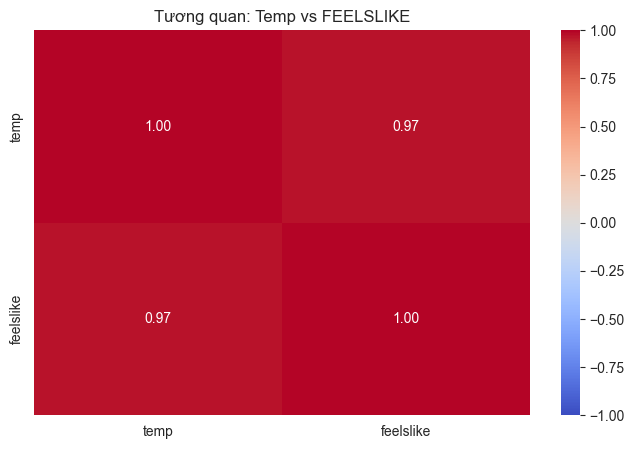

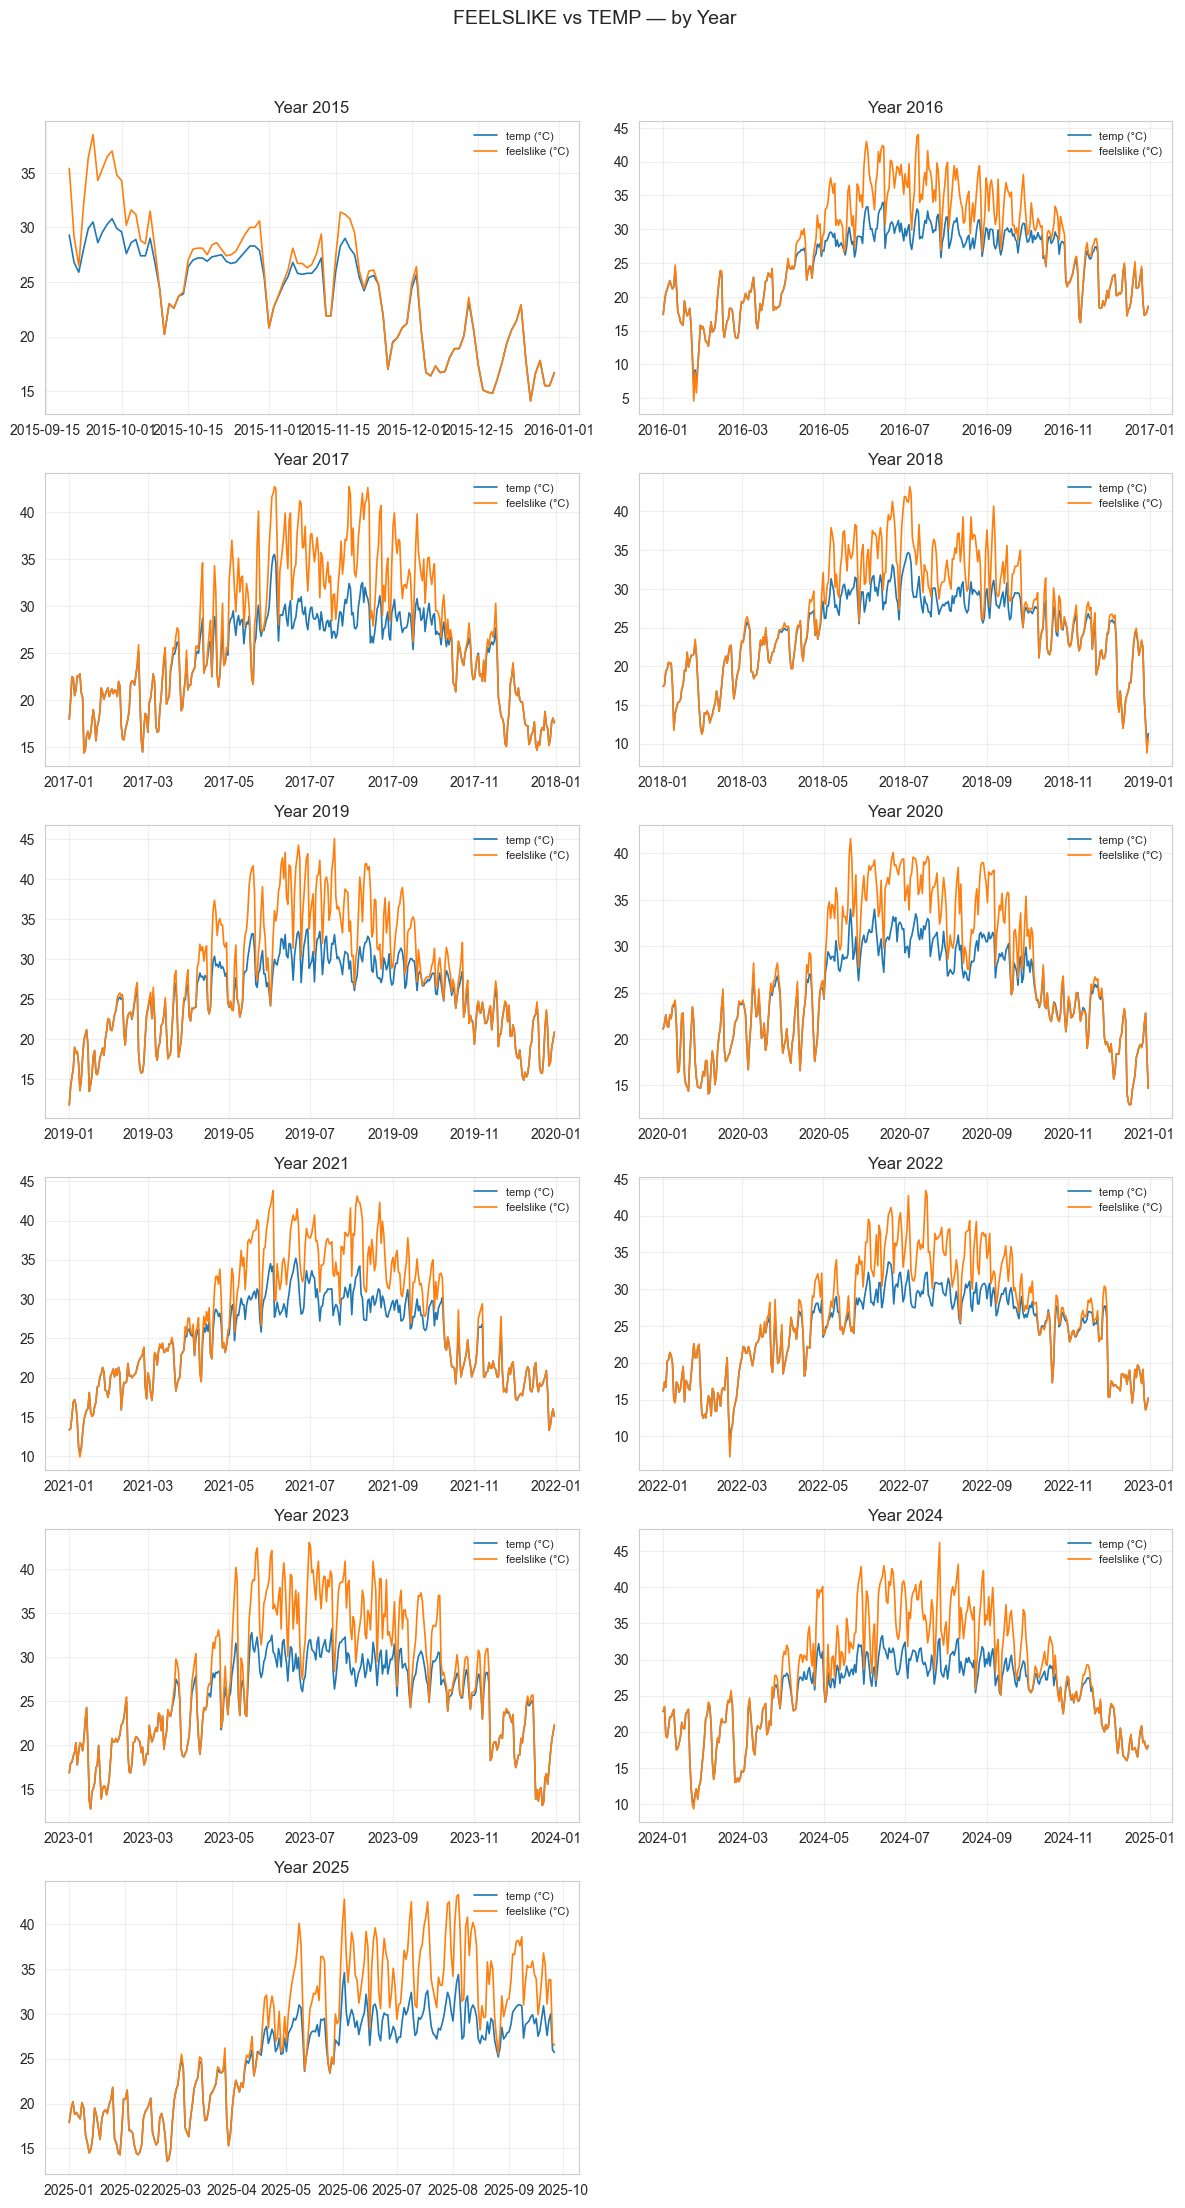

In [25]:
sns.heatmap(df[['temp','feelslike']].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Tương quan: Temp vs FEELSLIKE')
plot_pair_by_year(df, feature="feelslike", target="temp", title="FEELSLIKE vs TEMP — by Year", use_rolling=False)
plt.show()

### 3️⃣ Hypothesis
**Giả định:** `feelslike` tương quan dương mạnh với `temp`, đại diện tốt cho **cảm nhận nhiệt sinh lý** nên phản ánh biến động `temp` khá trung thực nhưng nhạy hơn với ẩm/gió.

### 4️⃣ Verification
- **Pearson r≈0.95** giữa `temp` và `feelslike`.  
- Scatter + heatmap xác nhận; nhiễu cục bộ xuất hiện trong ngày mưa/gió.

### 5️⃣ Feature Engineering Decision
✅ **Giữ `feelslike`** như một biến thay thế/bổ sung cho `temp`.  
**Lag:** {1, 3} để phản ánh quán tính cảm nhận ngắn hạn.  
**Rolling:** mean {3, 7} để làm mượt dao động tuần.  
**Lưu ý:** tránh trùng thông tin nếu đã dùng nhiều biến nhiệt độ; kiểm tra đa cộng tuyến.

## III. FEELSLIKEMAX vs `temp`

### 1️⃣ Domain Knowledge
- **Định nghĩa:** `feelslikemax` là **nhiệt độ cảm nhận cực đại** trong ngày; thường **cao hơn** `tempmax` khi độ ẩm cao (hiệu ứng nóng bức).
- **Ý nghĩa thực tiễn:** chỉ báo rủi ro **heatwave** đối với sức khoẻ; phản ánh **tải nhiệt sinh lý** cao nhất trong ngày.

### 2️⃣ Observed Pattern
- Phân tán với `temp` cho quan hệ dương mạnh, nhưng dễ **phi tuyến nhẹ** (độ ẩm cao đẩy cảm nhận lên nhanh hơn).
- Các đợt nắng nóng kéo dài thể hiện **cum điểm ở vùng giá trị cao**, bộc lộ rủi ro cực trị.

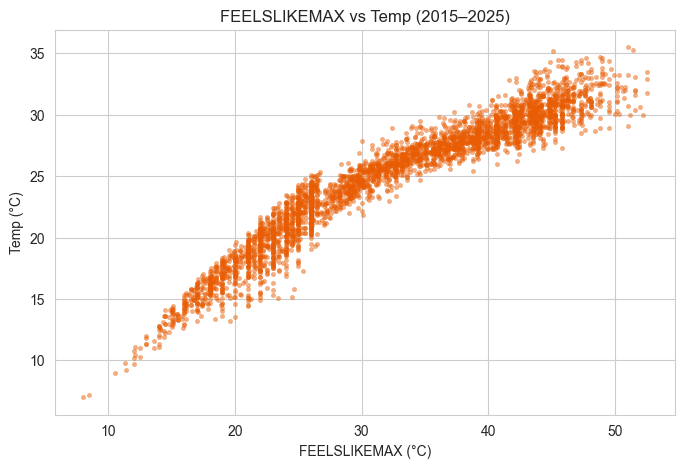

In [28]:
sns.scatterplot(x=df['feelslikemax'], y=df['temp'], s=10, alpha=0.5, edgecolor=None, color='#e85d04')
plt.title('FEELSLIKEMAX vs Temp (2015–2025)')
plt.xlabel('FEELSLIKEMAX (°C)'); plt.ylabel('Temp (°C)')
plt.show()

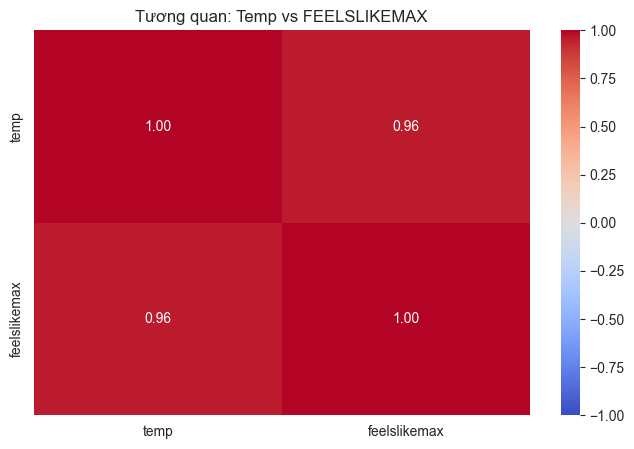

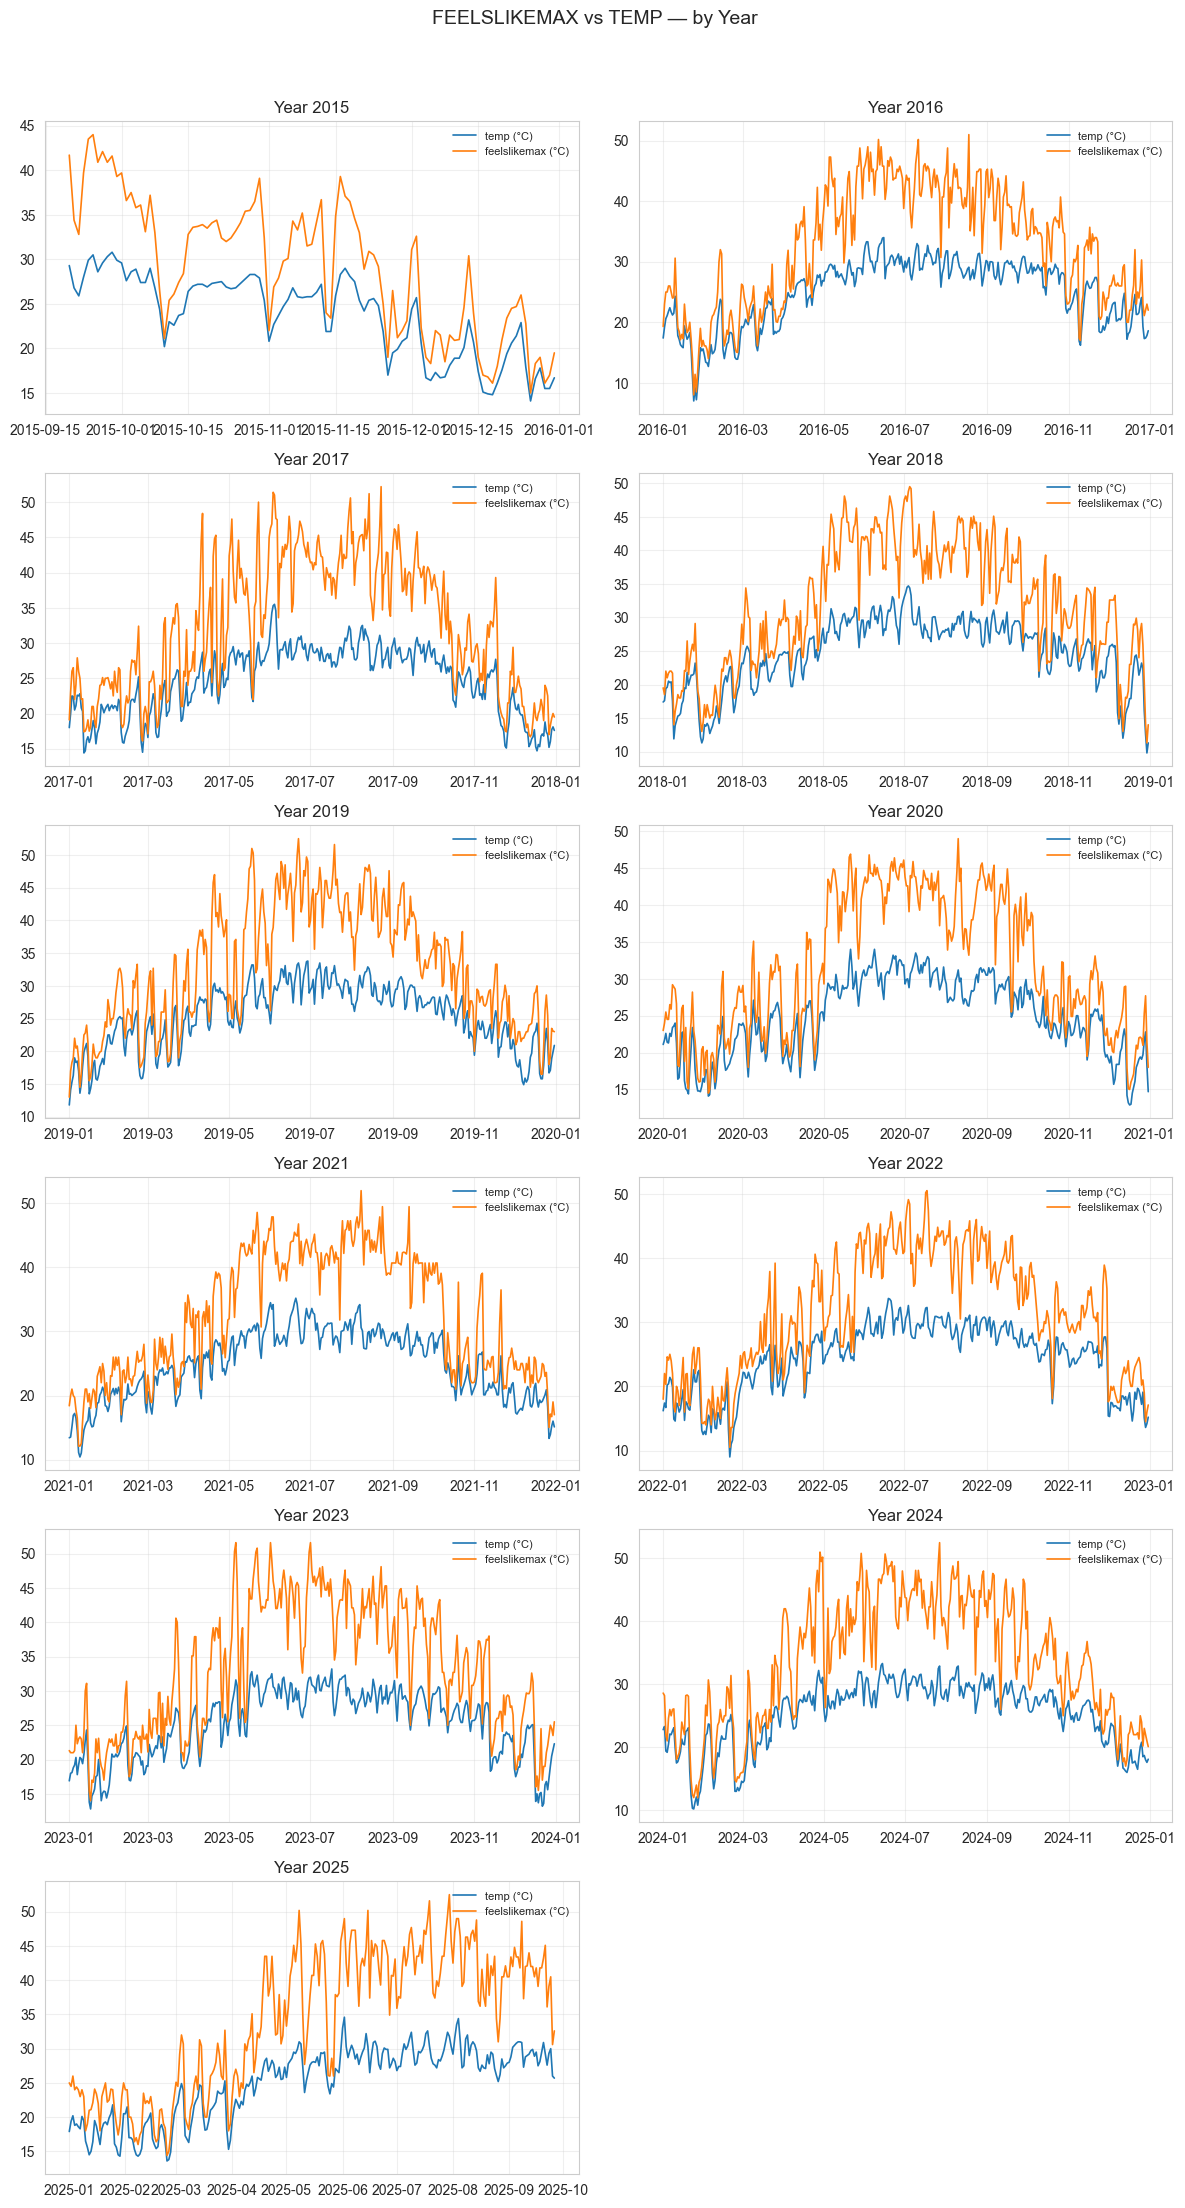

In [29]:
sns.heatmap(df[['temp','feelslikemax']].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Tương quan: Temp vs FEELSLIKEMAX')
plot_pair_by_year(df, feature="feelslikemax", target="temp", title="FEELSLIKEMAX vs TEMP — by Year", use_rolling=False)
plt.show()

### 3️⃣ Hypothesis
**Giả định:** `feelslikemax` tăng đồng pha với `temp` nhưng **nhạy hơn** trong điều kiện ẩm cao; có thể cải thiện dự báo đỉnh nóng so với chỉ dùng `tempmax`.

### 4️⃣ Verification
- **Pearson r≈0.93** với `temp`.  
- Scatter gợi ý tuyến tính với **độ cong nhẹ**; heatmap xác nhận tương quan dương mạnh.

### 5️⃣ Feature Engineering Decision
✅ **Giữ `feelslikemax`** cho các mô hình quan tâm **đỉnh nóng/cảm nhận**.  
**Lag:** {1, 3} ngày; **Rolling:** mean {3, 7}.  
**Gợi ý:** thêm biến nhị phân đánh dấu **đợt nóng (heatwave)** theo ngưỡng `feelslikemax`.

## III. FEELSLIKEMIN vs `temp`

### 1️⃣ Domain Knowledge
- **Định nghĩa:** `feelslikemin` là **nhiệt độ cảm nhận thấp nhất** trong ngày; thường **thấp hơn** `tempmin` do hiệu ứng gió lạnh.
- **Ý nghĩa:** chỉ báo rủi ro **lạnh buốt** đối với sức khoẻ, đặc biệt ở nhóm nhạy cảm (người già, trẻ nhỏ).

### 2️⃣ Observed Pattern
- Với `temp`, quan hệ dương mạnh nhưng phân tán **rộng hơn** về mùa Đông (gió mùa Đông Bắc làm tăng cảm giác lạnh). 
- Một số ngày cực trị thể hiện độ lệch **âm** đáng kể so với `tempmin`.

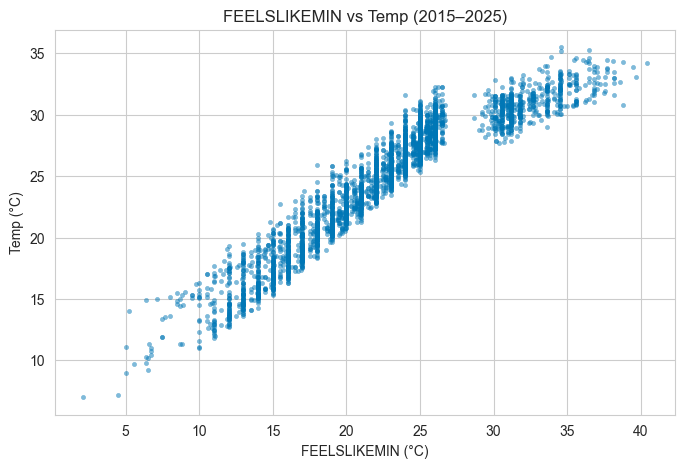

In [20]:
sns.scatterplot(x=df['feelslikemin'], y=df['temp'], s=10, alpha=0.5, edgecolor=None, color='#0077b6')
plt.title('FEELSLIKEMIN vs Temp (2015–2025)')
plt.xlabel('FEELSLIKEMIN (°C)'); plt.ylabel('Temp (°C)')
plt.show()

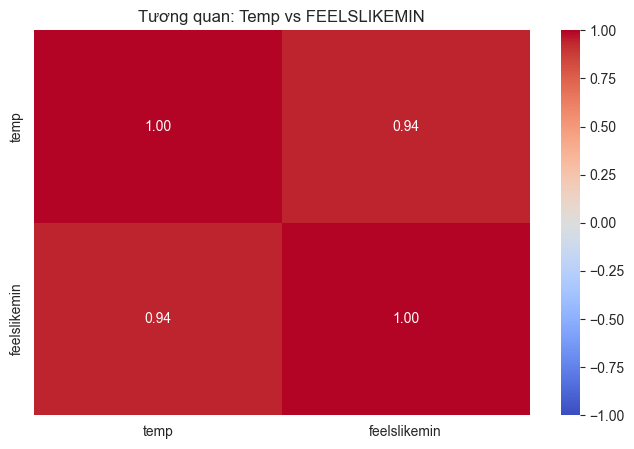

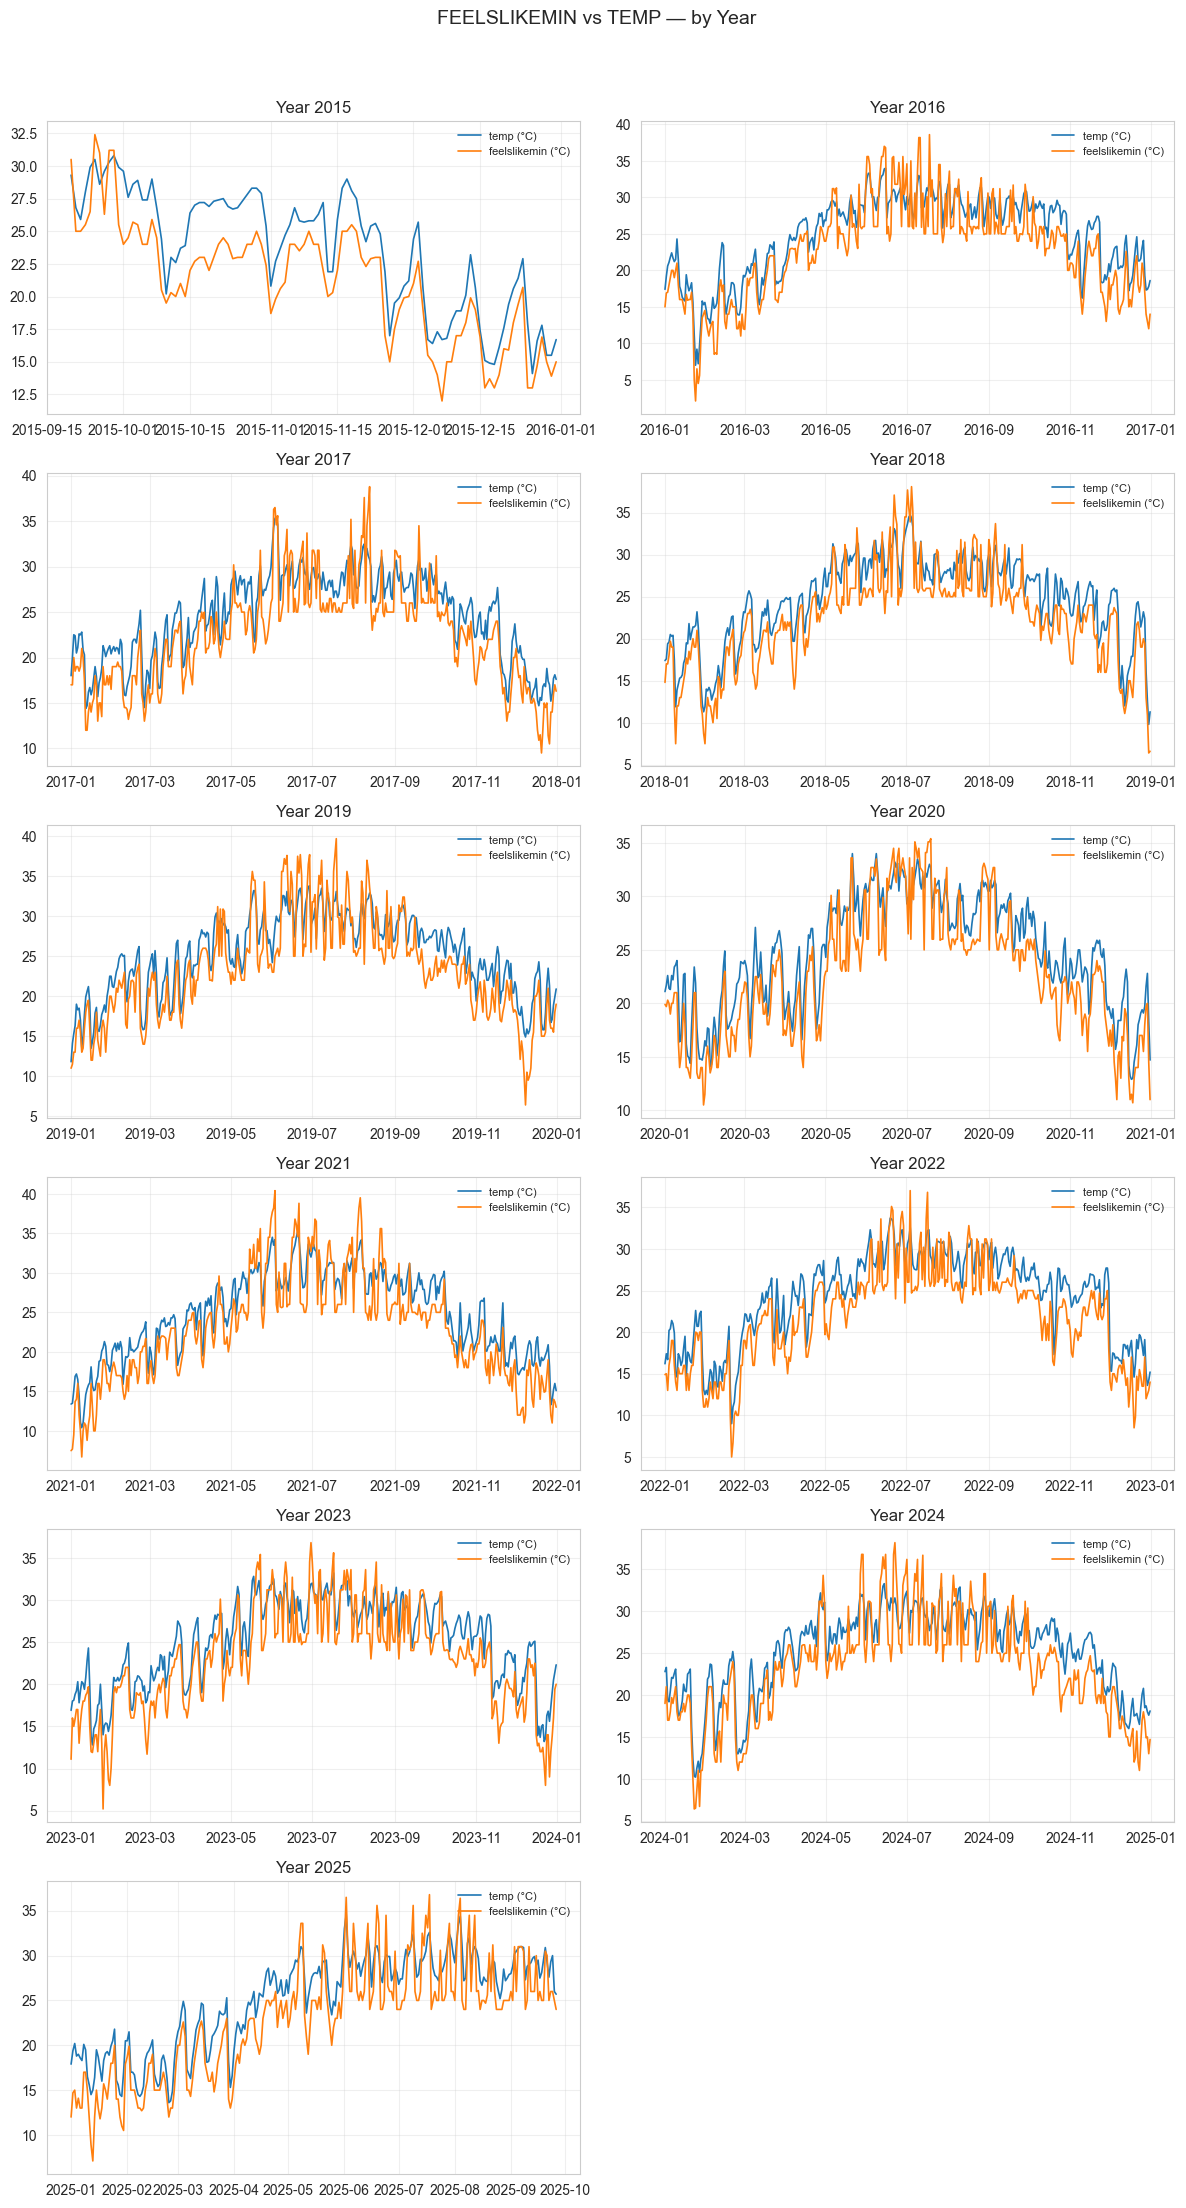

In [27]:
sns.heatmap(df[['temp','feelslikemin']].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Tương quan: Temp vs FEELSLIKEMIN')
plot_pair_by_year(df, feature="feelslikemin", target="temp", title="FEELSLIKEMIN vs TEMP — by Year", use_rolling=False)

plt.show()

### 3️⃣ Hypothesis
**Giả định:** `feelslikemin` tăng cùng `temp` nhưng **nhạy** với gió; do đó có thể giải thích tốt hơn cảm nhận lạnh so với chỉ dùng `tempmin`.

### 4️⃣ Verification
- **Pearson r≈0.91** với `temp`.  
- Scatter + heatmap xác nhận tương quan dương mạnh; tồn tại nhiễu mùa Đông do gió.

### 5️⃣ Feature Engineering Decision
✅ **Giữ `feelslikemin`** nếu bài toán quan tâm **rủi ro lạnh**.  
**Lag:** {1, 3, 7}; **Rolling:** mean {3, 7, 14} để nắm xu hướng lạnh ổn định.  
**Gợi ý:** tạo biến `feelslikemax − feelslikemin` để đo **biên độ cảm nhận** ngày–đêm.

## IV. Tổng kết & Khuyến nghị triển khai

| Feature | Quan hệ với `temp` | Pearson r (ước lượng) | Quyết định | Lag | Rolling |
|---|---|---|---|---|---|
| `tempmax` | Dương mạnh, gần tuyến tính | ~0.95 | Giữ | {1,3} | mean {3,7} |
| `tempmin` | Dương mạnh (nền nhiệt) | ~0.90 | Giữ | {1,3,7} | mean {3,7,14} |
| `feelslike` | Dương mạnh (sinh lý) | ~0.95 | Giữ | {1,3} | mean {3,7} |
| `feelslikemax` | Dương mạnh, nhạy ẩm | ~0.93 | Giữ | {1,3} | mean {3,7} |
| `feelslikemin` | Dương mạnh, nhạy gió | ~0.91 | Giữ | {1,3,7} | mean {3,7,14} |

**Ghi chú thực hành:**
- Kiểm tra **đa cộng tuyến** khi dùng nhiều biến nhiệt độ cùng lúc; cân nhắc PCA hoặc regularization (L1/L2).
- Đảm bảo **không rò rỉ tương lai**: mọi rolling phải `shift(1)` khi dùng trong huấn luyện dự báo.
- Cân nhắc thêm **biến biên độ** `tempmax − tempmin` và **biên độ cảm nhận** `feelslikemax − feelslikemin`.
- Với tác vụ cảnh báo cực trị (heatwave/cold snap), ưu tiên `feelslikemax`/`feelslikemin` làm chỉ báo rủi ro.
